In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from dataset.led_age_series_util import calculate_decay_constant

seed = 42
R90_MIN = 10000
R90_MAX = 50000

rng = np.random.default_rng(seed)
timesteps = np.arange(0, 50000, 1000)

errors_online = [17.733409881591797, 17.91925621032715, 18.174436569213867, 17.76131820678711, 17.909442901611328, 19.256511688232422, 18.84959602355957, 20.565608978271484, 20.734323501586914, 22.69554328918457, 21.778766632080078, 22.27067756652832, 20.086929321289062, 20.628807067871094, 20.803401947021484, 20.22920036315918, 19.52891731262207, 21.08747100830078, 22.80455780029297, 22.376657485961914, 19.845251083374023, 20.947633743286133, 22.13810920715332, 19.209077835083008, 20.896875381469727, 21.61903190612793, 21.60796356201172, 19.298686981201172, 17.882190704345703, 20.329978942871094, 21.217451095581055, 18.744564056396484, 19.777616500854492, 17.925426483154297, 18.476716995239258, 19.4136962890625, 18.548479080200195, 19.023530960083008, 19.80255889892578, 19.881561279296875, 21.06966781616211, 20.6518497467041, 17.934600830078125, 19.60152816772461, 19.657852172851562, 20.37905502319336, 19.71186065673828, 20.00634002685547, 20.140905380249023, 20.332542419433594]
errors_offline = [14.262529373168945, 15.155691146850586, 14.635915756225586, 15.092463493347168, 15.726496696472168, 16.93980598449707, 15.510702133178711, 16.24753761291504, 16.766910552978516, 18.041349411010742, 18.48862648010254, 19.10970687866211, 19.024822235107422, 20.25300407409668, 20.549373626708984, 20.518102645874023, 21.62308692932129, 22.451622009277344, 22.24475860595703, 22.883272171020508, 22.797182083129883, 23.375293731689453, 23.89368438720703, 23.877967834472656, 25.18282699584961, 26.589584350585938, 27.29003143310547, 27.218095779418945, 27.857620239257812, 28.051485061645508, 29.653846740722656, 28.866525650024414, 31.551481246948242, 31.589984893798828, 31.373811721801758, 32.36132049560547, 33.41649627685547, 34.59769058227539, 33.90228271484375, 35.20681381225586, 35.765628814697266, 34.83518981933594, 37.1057014465332, 36.709129333496094, 37.267906188964844, 39.16505813598633, 38.98064422607422, 39.949913024902344, 41.07151412963867, 40.84061050415039]

In [2]:
r90_hours = rng.integers(R90_MIN, R90_MAX, 36)
decay_ks = calculate_decay_constant(r90_hours)

relative_decay = np.exp(-np.outer(timesteps, decay_ks))
# Add noise to the data
relative_decay += rng.normal(0, 0.1, size=relative_decay.shape)

relative_decay = torch.tensor(relative_decay, dtype=torch.float)
avg_decay = relative_decay.mean(dim=1)

[Text(0.5, 1.0, 'Average Decay Scalar vs. Time')]

<Figure size 1000x600 with 0 Axes>

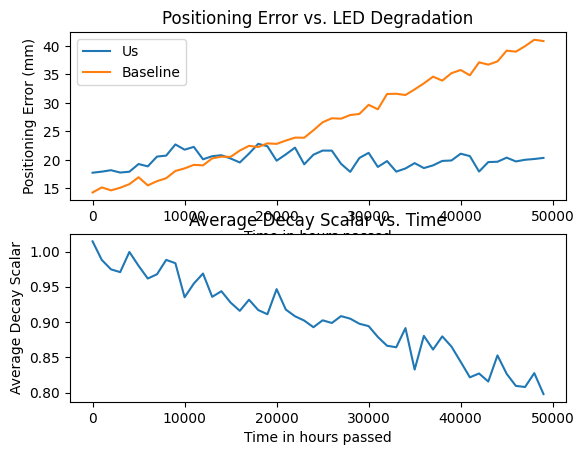

In [3]:
plt.figure(figsize=(10, 6))
_, axs = plt.subplots(2)

axs[0].plot(timesteps, errors_online, label="Us")
axs[0].plot(timesteps, errors_offline, label="Baseline")
axs[0].set(xlabel='Time in hours passed', ylabel='Positioning Error (mm)')
axs[0].set(title='Positioning Error vs. LED Degradation')
axs[0].legend()

axs[1].plot(timesteps, avg_decay, label="Average Decay")
axs[1].set(xlabel='Time in hours passed', ylabel='Average Decay Scalar')
axs[1].set(title='Average Decay Scalar vs. Time')

<Figure size 1200x800 with 0 Axes>

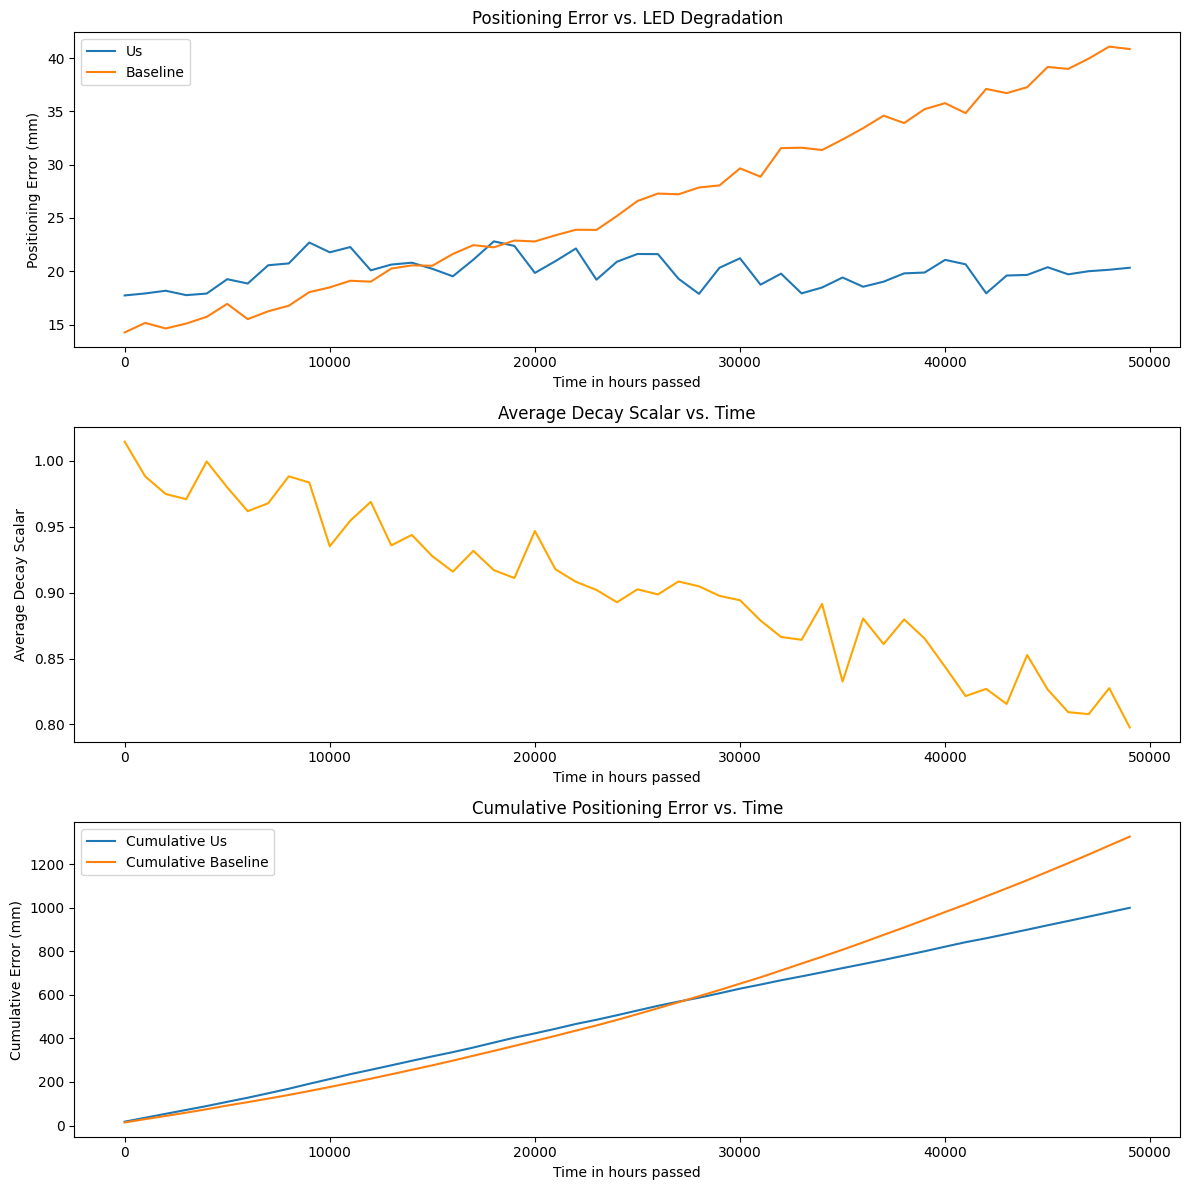

In [4]:
# Compute cumulative error
cumulative_online = np.cumsum(errors_online)
cumulative_offline = np.cumsum(errors_offline)

plt.figure(figsize=(12, 8))
fig, axs = plt.subplots(3, figsize=(12, 12))

# Plot regular error over time
axs[0].plot(timesteps, errors_online, label="Us")
axs[0].plot(timesteps, errors_offline, label="Baseline")
axs[0].set(xlabel='Time in hours passed', ylabel='Positioning Error (mm)')
axs[0].set(title='Positioning Error vs. LED Degradation')
axs[0].legend()

# Plot average decay
axs[1].plot(timesteps, avg_decay, label="Average Decay", color='orange')
axs[1].set(xlabel='Time in hours passed', ylabel='Average Decay Scalar')
axs[1].set(title='Average Decay Scalar vs. Time')

# Plot cumulative error
axs[2].plot(timesteps, cumulative_online, label="Cumulative Us")
axs[2].plot(timesteps, cumulative_offline, label="Cumulative Baseline")
axs[2].set(xlabel='Time in hours passed', ylabel='Cumulative Error (mm)')
axs[2].set(title='Cumulative Positioning Error vs. Time')
axs[2].legend()

plt.tight_layout()
plt.show()